****Financial Analysis of NBG (National Bank of Greece) Stock Performance, before and after the Greek Debt Crisis****

In [243]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

# Load and Inscpect the data
data = pd.read_csv('NBG.csv', parse_dates = ['Date'], index_col = 'Date')

# Keep only the Adjusted close price and the volume
data = data[['Adj Close',	'Volume']]
data.rename(columns = {'Adj Close': 'Price'}, inplace = True)

print("""
Nan values: {}
Shape of the data: {}
""".format(*data.isnull().sum()), data.shape)


Nan values: 0
Shape of the data: 0
 (4827, 2)


**Plot the overall NBG's performance**

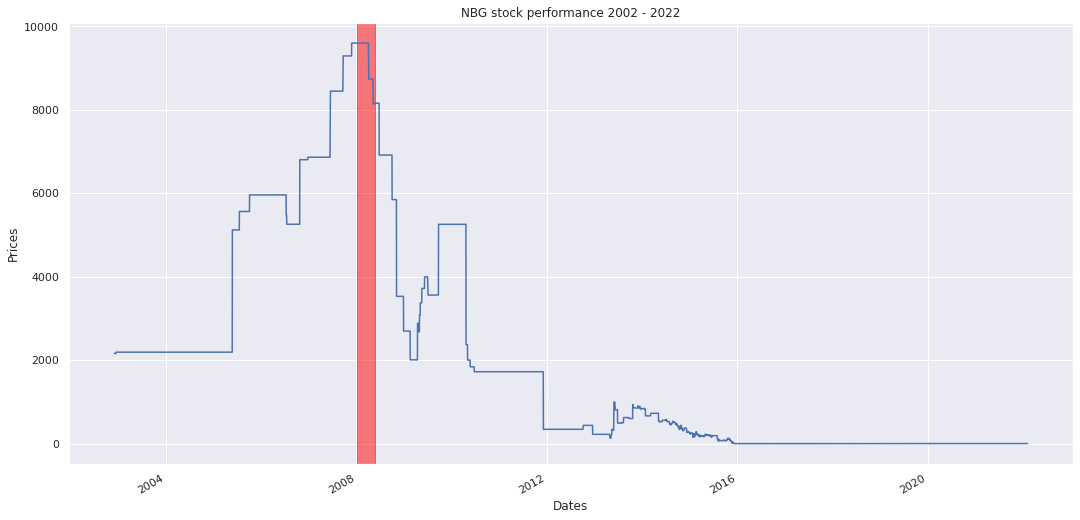

In [244]:
sns.set()

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize = (18, 9))
ax.plot_date(data.index, data.Price, 'b-')
ax.axvspan(*mdates.datestr2num(['2008-1-04', '2008-05-28']), color='red', alpha=0.5)
ax.set_xlabel('Dates')
ax.set_ylabel('Prices')
ax.set_title('NBG stock performance 2002 - 2022')
fig.autofmt_xdate()
plt.show()

Split the data into two categories, before and after the 2008 Debt Crisis

In [245]:
data_before = data[data.index <= '2007-12-31']
data_after = data[data.index >= '2008-01-04']

Plot the Moving Averages of 30, 90, 180 and 360 days, for each period

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

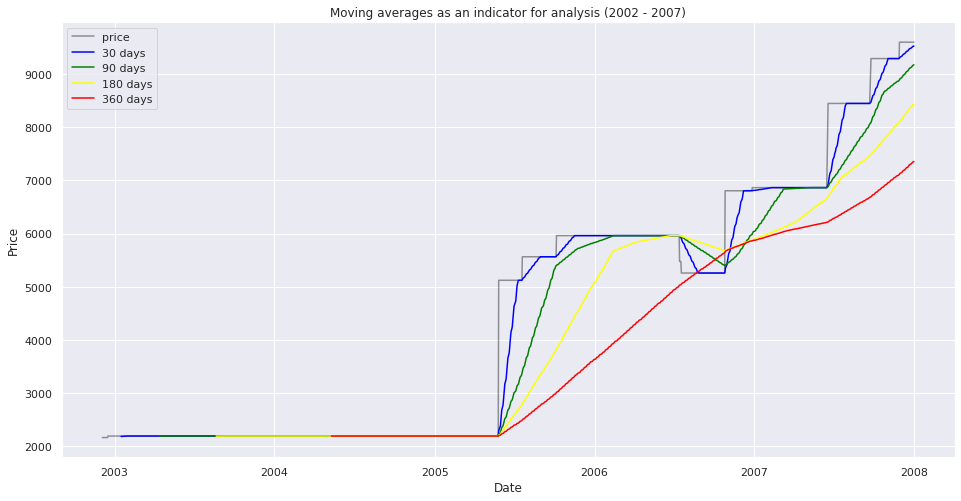

In [246]:
# Moving averages for 2002 - 2009 

data_before['MA_30'] = data_before.Price.rolling(window = 30).mean()
data_before['MA_90'] = data_before.Price.rolling(window = 90).mean()
data_before['MA_180'] = data_before.Price.rolling(window = 180).mean()
data_before['MA_360'] = data_before.Price.rolling(window = 360).mean()

plt.figure(figsize = (16, 8))

plt.plot(data_before.Price, label = 'price', color = 'black', alpha = 0.4)
plt.plot(data_before.MA_30, label = '30 days', color = 'blue')
plt.plot(data_before.MA_90, label = '90 days', color = 'green')
plt.plot(data_before.MA_180, label = '180 days', color = 'yellow')
plt.plot(data_before.MA_360, label = '360 days', color = 'red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving averages as an indicator for analysis (2002 - 2007)')
plt.legend(loc = 'best')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

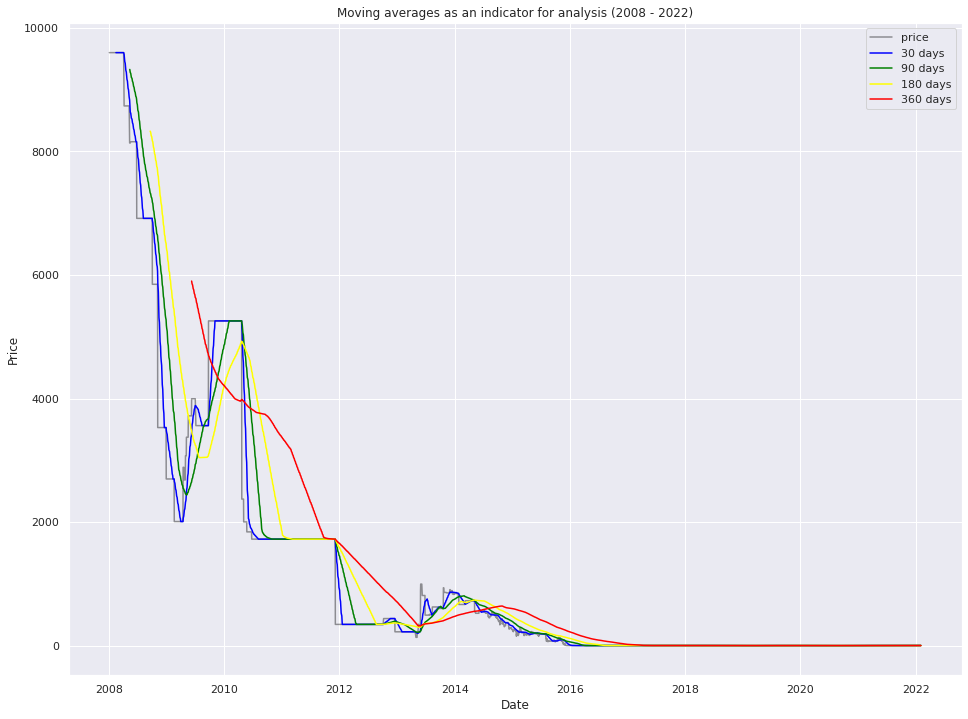

In [247]:
# Moving averages for 2008 - 2022

data_after['MA_30'] = data_after.Price.rolling(window = 30).mean()
data_after['MA_90'] = data_after.Price.rolling(window = 90).mean()
data_after['MA_180'] = data_after.Price.rolling(window = 180).mean()
data_after['MA_360'] = data_after.Price.rolling(window = 360).mean()

plt.figure(figsize = (16, 12))

plt.plot(data_after.Price, label = 'price', color = 'black', alpha = 0.4)
plt.plot(data_after.MA_30, label = '30 days', color = 'blue')
plt.plot(data_after.MA_90, label = '90 days', color = 'green')
plt.plot(data_after.MA_180, label = '180 days', color = 'yellow')
plt.plot(data_after.MA_360, label = '360 days', color = 'red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving averages as an indicator for analysis (2008 - 2022)')
plt.legend(loc = 'best')
plt.show()

Some basic statistics 

In [248]:
# Before the Debt Crisis
data_before.describe(include = 'all')

,Price,Volume,MA_30,MA_90,MA_180,MA_360
count,1277.000000,1277.0,1248.000000,1188.000000,1098.000000,918.000000
mean,4468.388736,0.0,4435.536019,4369.592223,4288.097682,4199.485746
std,2415.157023,0.0,2354.086021,2226.929869,2051.384519,1771.415398
min,2165.550049,0.0,2185.394946,2191.064917,2192.482409,2193.191156
25%,2193.899902,0.0,2193.899902,2193.899902,2193.899902,2193.899902
50%,5122.500000,0.0,5073.689998,4245.571633,4092.323292,4085.261622
75%,5962.500000,0.0,5962.500000,5962.500000,5936.447542,5951.430452
max,9600.000000,0.0,9528.180045,9173.950054,8432.940023,7356.610908


In [249]:
# After the Debt Crisis
data_after.describe(include = 'all')

,Price,Volume,MA_30,MA_90,MA_180,MA_360
count,3548.000000,3548.000000,3519.000000,3459.000000,3369.000000,3189.000000
mean,1207.363151,8602.700395,1177.741340,1115.856223,1033.685491,926.116291
std,2160.072039,22564.219690,2090.185704,1930.714669,1704.315251,1428.239268
min,0.980000,0.000000,1.177433,1.318556,1.339106,2.028519
25%,2.900000,0.000000,2.901117,2.844244,2.788906,2.752639
50%,225.000000,0.000000,219.050000,223.333333,279.871666,305.703333
75%,1725.000000,4425.000000,1725.000000,1725.000000,1479.666667,1084.833333
max,9600.000000,287700.000000,9600.000000,9327.916667,8329.068286,5902.453296


The Cummulative Returns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


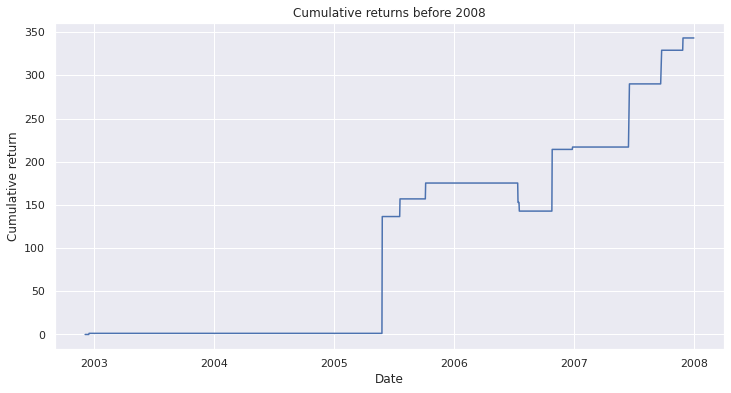

In [250]:
# Before 2008
data_before['returns'] = data_before.Price.pct_change()
returns_plus_one = data_before.returns.add(1)
cummulative_returns = returns_plus_one.cumprod().sub(1)
cummulative_returns = cummulative_returns.mul(100)


plt.figure(figsize = (12, 6))
plt.plot(data_before.index, cummulative_returns)

plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.title('Cumulative returns before 2008')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


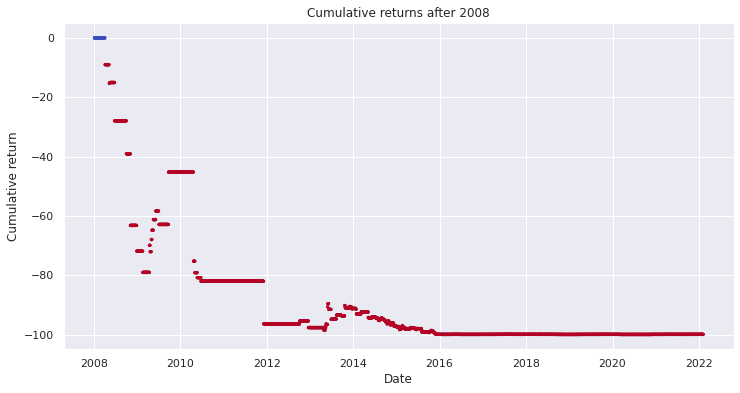

In [251]:
# After 2008

data_after['returns'] = data_after.Price.pct_change()
returns_plus_one = data_after.returns.add(1)
cummulative_returns = returns_plus_one.cumprod().sub(1)
cummulative_returns = cummulative_returns.mul(100)

condition = [i < 0 for i in cummulative_returns]

plt.figure(figsize = (12, 6))
plt.scatter(data_after.index, cummulative_returns, c = condition, s = 5, cmap='coolwarm')


plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.title('Cumulative returns after 2008')
plt.show()

In [252]:
# What if you had Invest  $10.000 in 2002

investment = 10000

data['returns'] = data.Price.pct_change()
current_value = data.returns.add(1).cumprod().mul(investment)[-1]
loss = data.returns.add(1).cumprod().sub(1).mul(investment)[-1]

print("""
Initial Investment in 2002: ${}
2022 Investment's value: ${}
Total loss: ${}
""".format(investment, np.round(current_value,1), np.round(loss,1)))


Initial Investment in 2002: $10000
2022 Investment's value: $18.4
Total loss: $-9981.6



In [253]:
current_value

18.4248800984419

A Random Walk of NBG's daily returns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


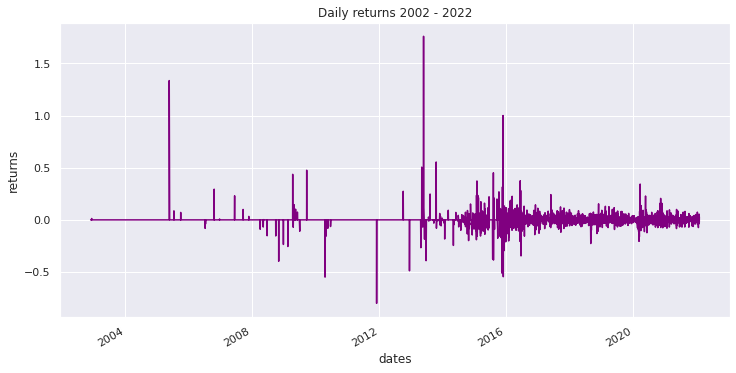

In [254]:
from numpy.random import normal, seed
from scipy.stats import norm
from numpy.random import choice

seed(42)

df = data[['Price']]
df['returns'] = df.pct_change()
plt.figure(figsize = (12, 6))

df.returns.plot(color = 'purple')
plt.xlabel('dates')
plt.ylabel('returns')
plt.title('Daily returns 2002 - 2022')
plt.show()

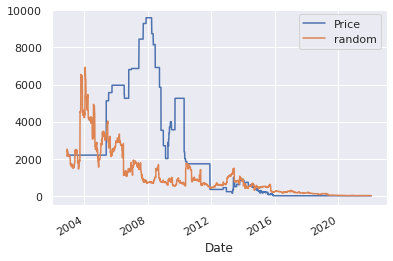

In [255]:
sample = df.returns.dropna()
n_obs = data.returns.count()
random_walk = choice(sample, n_obs)
random_walk = pd.Series(random_walk, index = sample.index)

start_date = df.Price.first('D')
nbs_random = start_date.append(random_walk.add(1))
df['random'] = nbs_random.cumprod()

df[['Price', 'random']].plot()

The Empirical cummulative distribution function of the daily returns against a CDF of a normal distribution

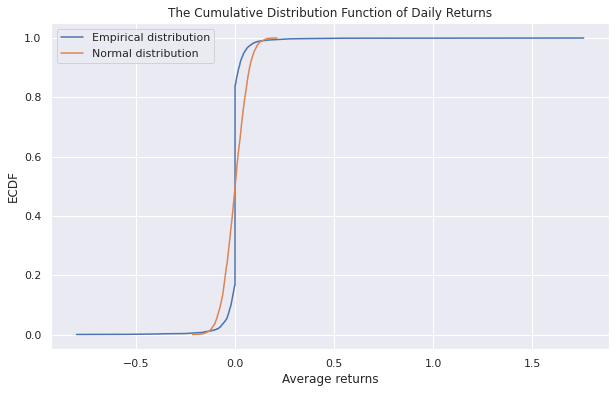

In [256]:
# Create the Empirical cummulative distribution function of the daily returns and plot them against a CDF of a normal distribution

def ecdf(data):
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  return x, y

normal_dist_data = np.random.normal(np.mean(data.returns), np.std(data.returns), size = len(data.returns))

plt.figure(figsize = (10, 6))
plt.plot(*ecdf(data.returns), label = 'Empirical distribution')
plt.plot(*ecdf(normal_dist_data), label = 'Normal distribution')
plt.xlabel('Average returns')
plt.ylabel('ECDF')
plt.title('The Cumulative Distribution Function of Daily Returns')
plt.legend()
plt.show()

100.000 replicates with the standard deviation as the test statistic, to measure risk

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


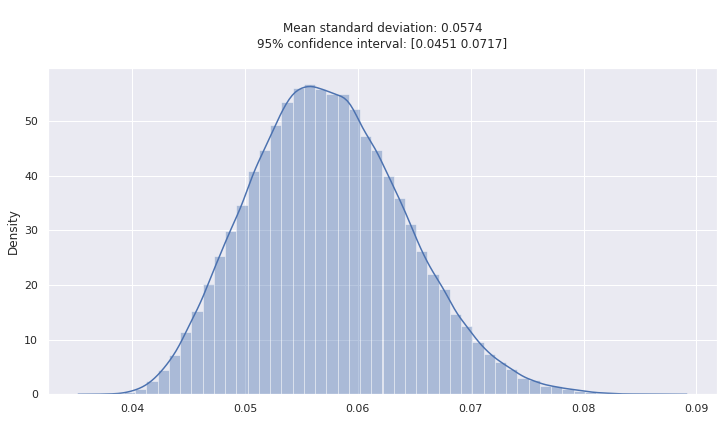

In [257]:
def bootstrap_replicates(data, func):
  samples = np.random.choice(data, size = len(data))
  return func(samples)

def draw_bs_reps(data, func, size = 1):
  bs_replicates = np.empty(size)
  for i in range(size):
    bs_replicates[i] = bootstrap_replicates(data, func)
  return bs_replicates

daily_returns = data.returns[1:]
replicates = draw_bs_reps(daily_returns, np.std, size = 100000)

confidence_interval = np.percentile(replicates, [2.5, 97.5])
mean_std = np.mean(replicates)

plt.figure(figsize = (12, 6))
sns.distplot(replicates, kde=True)
plt.title("""
Mean standard deviation: {}
95% confidence interval: {}
""".format(np.round(mean_std, 4), np.round(confidence_interval, 4)))
plt.show()



Maximum gains and losses on monthly returns

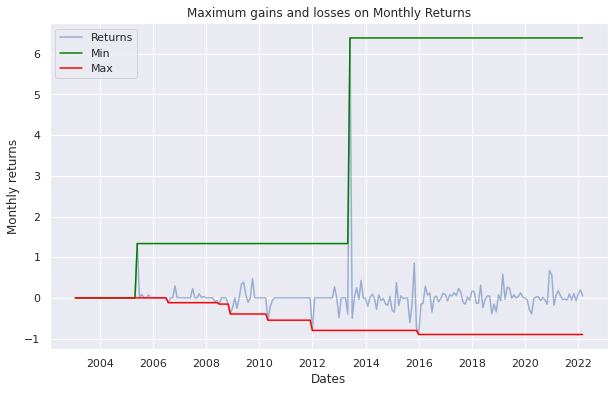

In [258]:
monthly_returns = pd.DataFrame(data.Price.resample('M').ffill().pct_change())

monthly_returns['running_min'] = monthly_returns.expanding().min()
monthly_returns['running_max'] = monthly_returns.Price.expanding().max()

plt.figure(figsize = (10, 6))
plt.plot(monthly_returns.Price, alpha = 0.5)
plt.plot(monthly_returns.running_max, color = 'green')
plt.plot(monthly_returns.running_min, color = 'red')
plt.ylabel('Monthly returns')
plt.xlabel('Dates')
plt.title('Maximum gains and losses on Monthly Returns')
plt.legend(['Returns', 'Min', 'Max'])
plt.show()